In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
stats_df = pd.read_pickle("result_df.pkl")

In [19]:
stats_df

,function,dimension,algorithm,obj_lists,min_found_lists,avg_min_found,std_min_found
0,ackley,10,basinhopping,"[[21.23412, 21.23412, 21.23412, 21.23412, 21.2...","[[21.23412, 21.23412, 21.23412, 21.23412, 21.2...","[20.95322036743164, 20.95322036743164, 20.9532...","[0.4799298346042633, 0.4799298346042633, 0.479..."
1,ackley,10,differential_evolution,"[[20.970161, 21.383083, 21.541191, 21.367462, ...","[[20.970161, 20.970161, 20.970161, 20.970161, ...","[21.358928680419922, 21.04205322265625, 20.861...","[0.23468589782714844, 0.45797276496887207, 0.3..."
2,ackley,10,direct,"[[4.552539, 17.018728, 17.45362, 17.018728, 17...","[[4.552539, 4.552539, 4.552539, 4.552539, 4.55...","[4.552539, 4.552539, 4.552539, 4.552539, 4.552...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,ackley,10,dual_annealing,"[[21.551155, 21.254986, 21.6148, 20.65361, 21....","[[21.551155, 21.254986, 21.254986, 20.65361, 2...","[20.95322036743164, 20.893985748291016, 20.893...","[0.4799298346042633, 0.39916253089904785, 0.39..."
4,ackley,10,mcir,"[[21.122943878173828, 21.122943878173828, 21.1...","[[21.122943878173828, 21.122943878173828, 21.1...","[20.95499038696289, 20.95499038696289, 20.9549...","[0.4690623126870676, 0.4690623126870676, 0.469..."
...,...,...,...,...,...,...,...
97,watson,32,differential_evolution,"[[307303.9192011102, 300601.11886811716, 20247...","[[307303.9192011102, 300601.11886811716, 30060...","[6844500.333347577, 1662800.6946316964, 136326...","[11484157.537096405, 1726414.08927726, 1784276..."
98,watson,32,direct,"[[528043.0017411856, 528043.0017411856, 528043...","[[528043.0017411856, 528043.0017411856, 528043...","[528043.0017411856, 528043.0017411856, 528043....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
99,watson,32,dual_annealing,"[[452408.46655145474, 37596435.013013594, 6810...","[[452408.46655145474, 452408.46655145474, 6810...","[37751606.73584604, 3791722.58588769, 2881944....","[62101331.395239055, 5219180.813468672, 538362..."
100,watson,32,mcir,"[[651574.6720559866, 651574.6720559866, 651574...","[[651574.6720559866, 651574.6720559866, 651574...","[588816.5247719139, 588816.5247719139, 588816....","[88753.42303854393, 88753.42303854393, 88753.4..."


In [42]:
stats_df = stats_df.drop(stats_df[stats_df['algorithm'] == 'shgo'].index)

In [43]:
func_dim_paris = set()
for _, row in stats_df.iterrows():
    func_dim_paris.add((row['function'], row['dimension']))
func_dim_paris

{('ackley', 10),
 ('ackley', 50),
 ('ackley', 100),
 ('ackley', 200),
 ('biggsbi1', 1001),
 ('eigenals', 111),
 ('harkerp', 101),
 ('levy', 10),
 ('levy', 50),
 ('levy', 100),
 ('levy', 200),
 ('michalewicz', 10),
 ('michalewicz', 50),
 ('michalewicz', 100),
 ('michalewicz', 200),
 ('vardim', 101),
 ('watson', 32)}

In [109]:
l = [1,2,3]

In [110]:
l[:100]

[1, 2, 3]

In [140]:
def plot(stats_df, function, dimension, xlim=None, ylim=None, log_x=False, log_y=False):
    plot_df = stats_df[(stats_df['function'] == function) & (stats_df['dimension'] == dimension)]
    
    fig, ax = plt.subplots(figsize=(8,8))
    for row_idx in range(len(plot_df)):
        df_row = plot_df.iloc[row_idx]

        all_results = df_row['min_found_lists']
        label = "{}_{}_{}".format(df_row['algorithm'], df_row['function'], df_row['dimension'])
        pd_all_results = pd.DataFrame(all_results)
        
        means = df_row['avg_min_found']
        err = df_row['std_min_found']
        
        if xlim is not None and xlim[1] is not None:
            means = means[:xlim[1]]
            err = err[:xlim[1]]

        ax.plot([i for i in range(len(means))], means, label=label)
        ax.fill_between([i for i in range(len(means))], means - err / 2, means + err / 2, alpha=0.2)

        ax.legend()
        
        if log_x:
            ax.set_xscale('log')
        if log_y:
            ax.set_yscale('log')
            
        ax.set_xlabel('# samples', fontsize=22)
        ax.set_ylabel('f(x)', fontsize=22)
        ax.tick_params(labelsize=14, labelrotation=30)
        
        
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    
    plt.show()

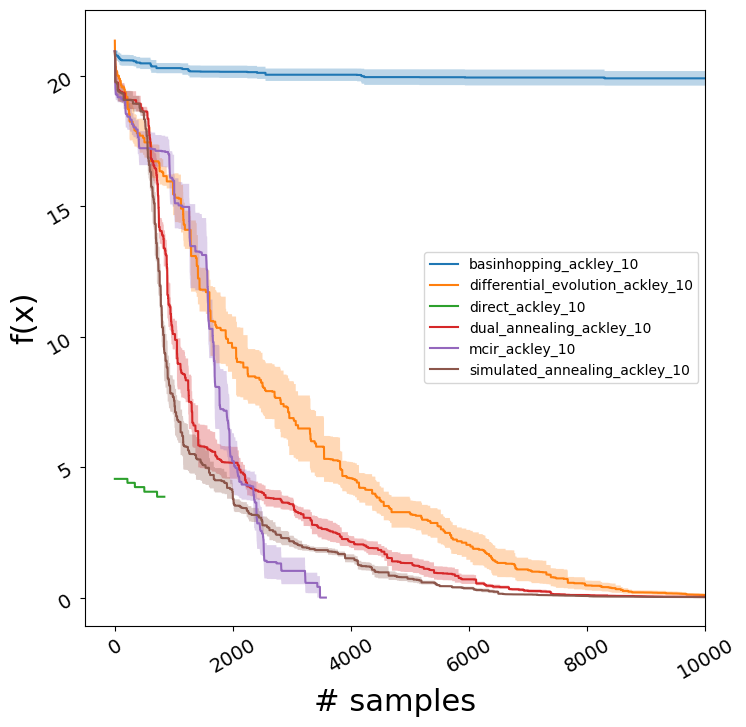

In [128]:
plot(stats_df, 'ackley', 10, xlim=[-500, 10000], ylim=[None, None])

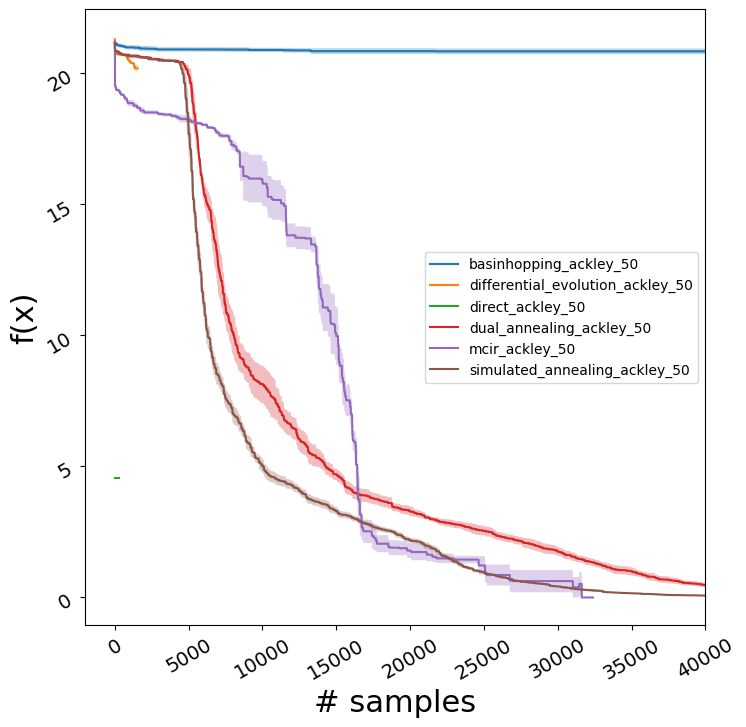

In [90]:
plot(stats_df, 'ackley', 50, xlim=[-2000, 40000], ylim=[None, None])

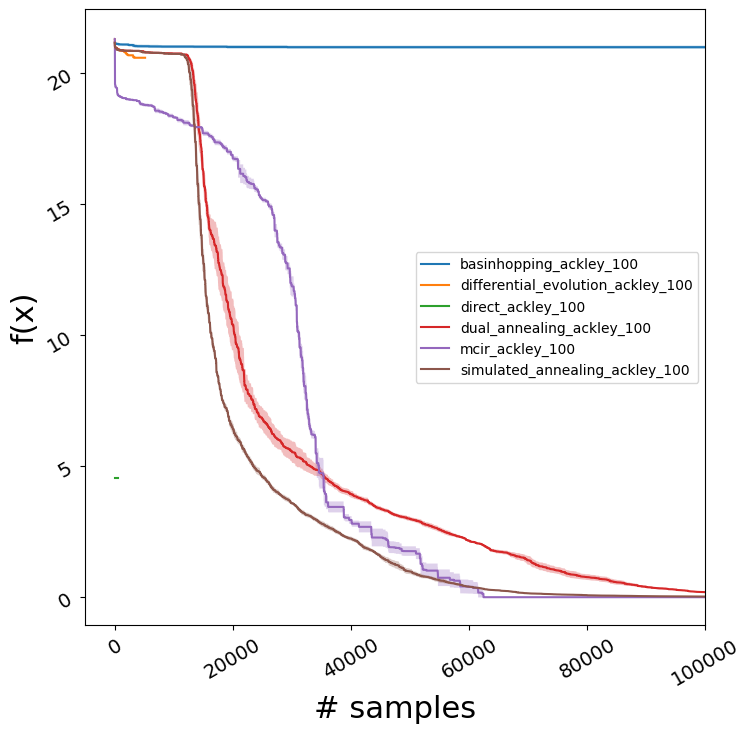

In [91]:
plot(stats_df, 'ackley', 100, xlim=[-5000, 100000])

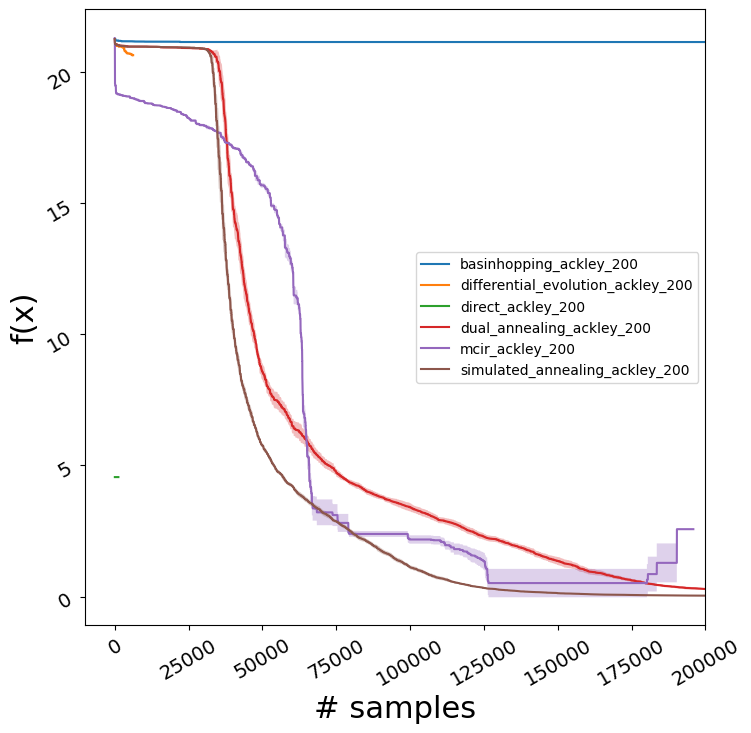

In [92]:
plot(stats_df, 'ackley', 200, xlim=[-10000, 200000])

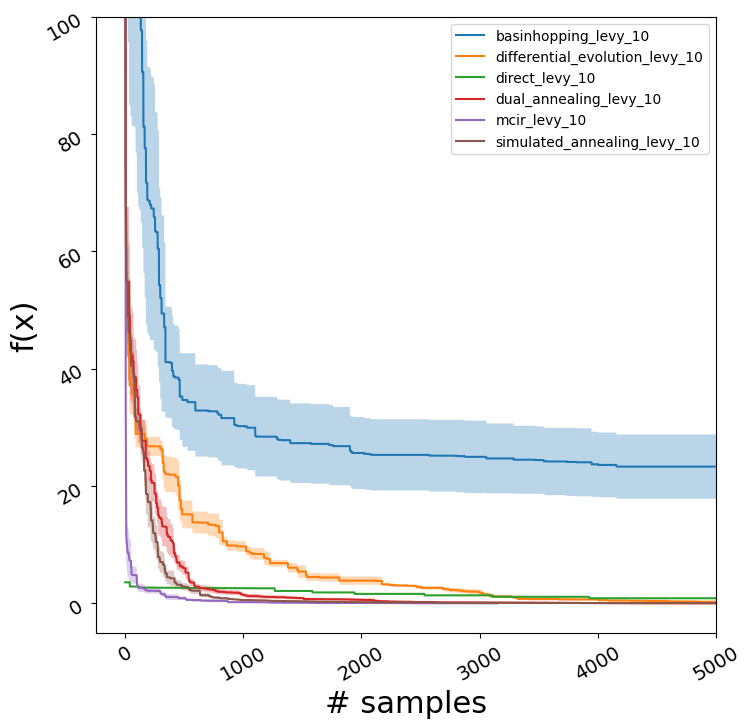

In [95]:
plot(stats_df, 'levy', 10, xlim=[-250, 5000], ylim=[-5, 100])

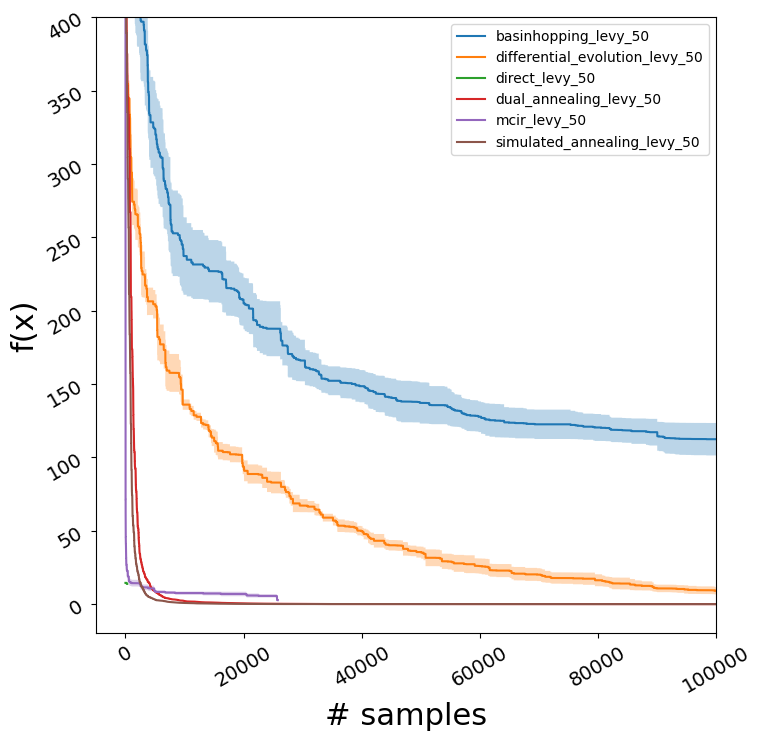

In [97]:
plot(stats_df, 'levy', 50, xlim=[-5000, 100000], ylim=[-20, 400])

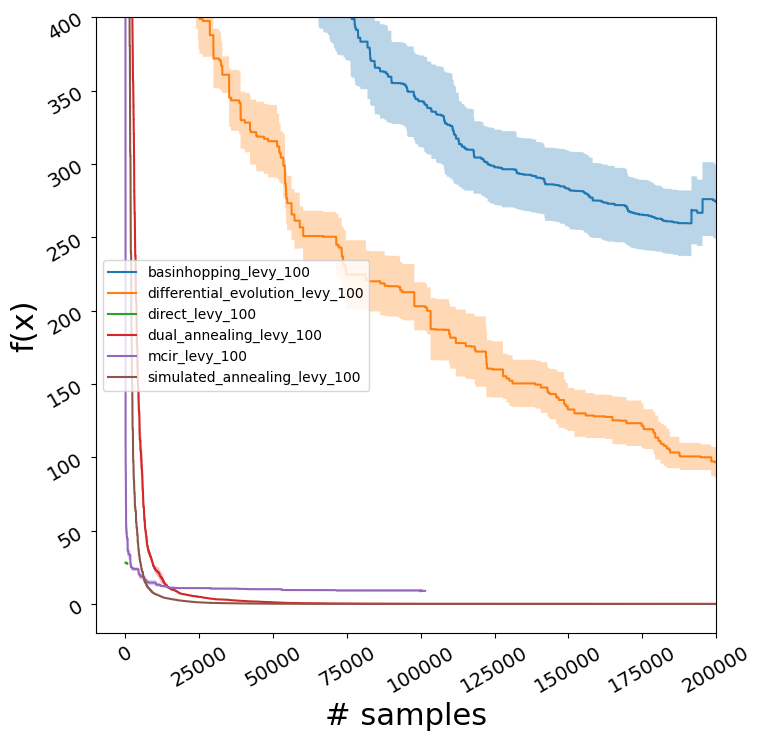

In [99]:
plot(stats_df, 'levy', 100, xlim=[-10000, 200000], ylim=[-20, 400])

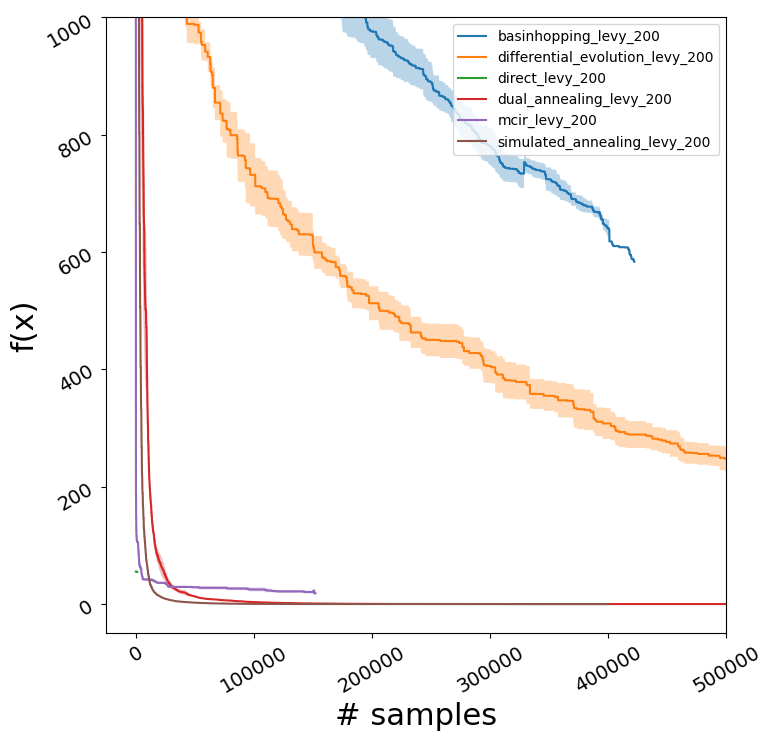

In [101]:
plot(stats_df, 'levy', 200, xlim=[-25000, 500000], ylim=[-50, 1000])

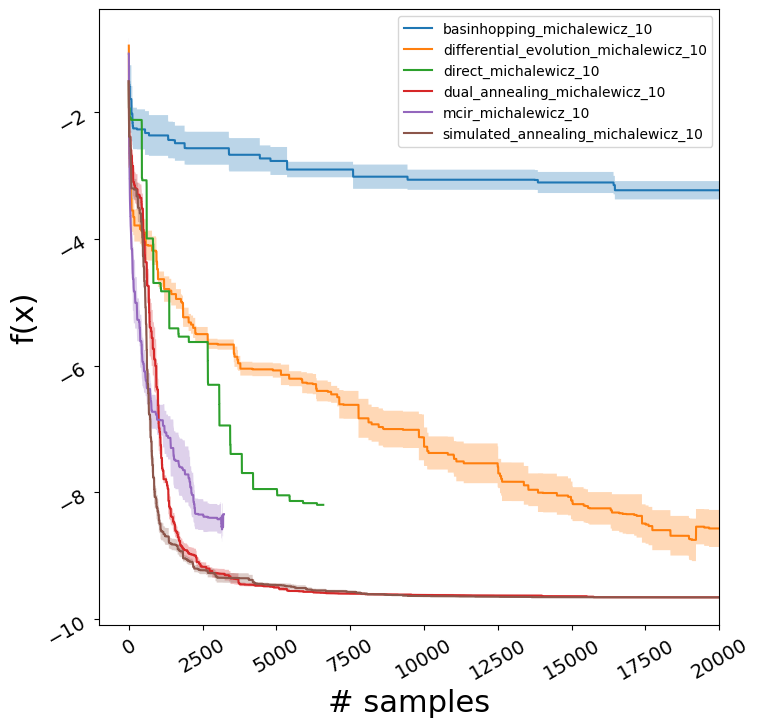

In [103]:
plot(stats_df, 'michalewicz', 10, xlim=[-1000, 20000], ylim=[None, None])

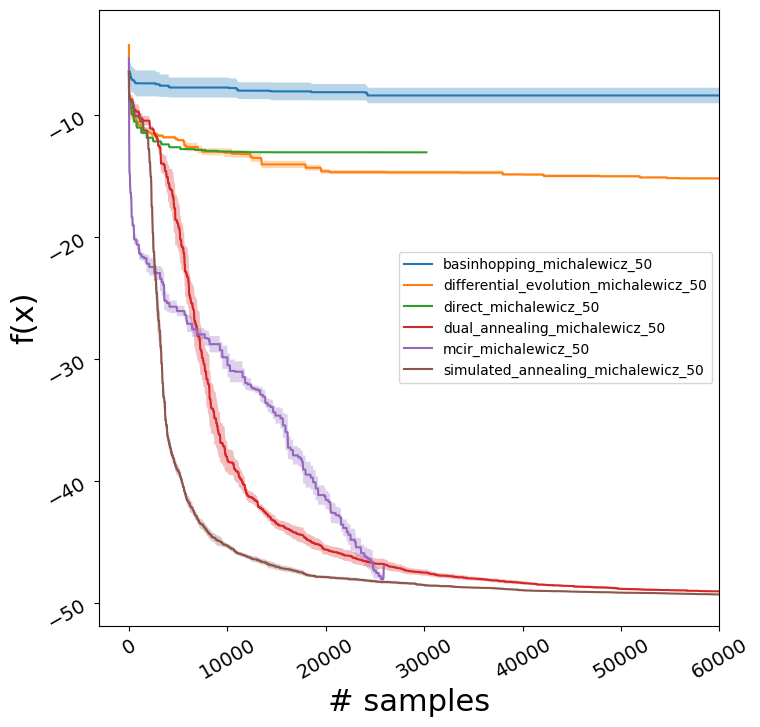

In [106]:
plot(stats_df, 'michalewicz', 50, xlim=[-3000, 60000], ylim=[None, None])

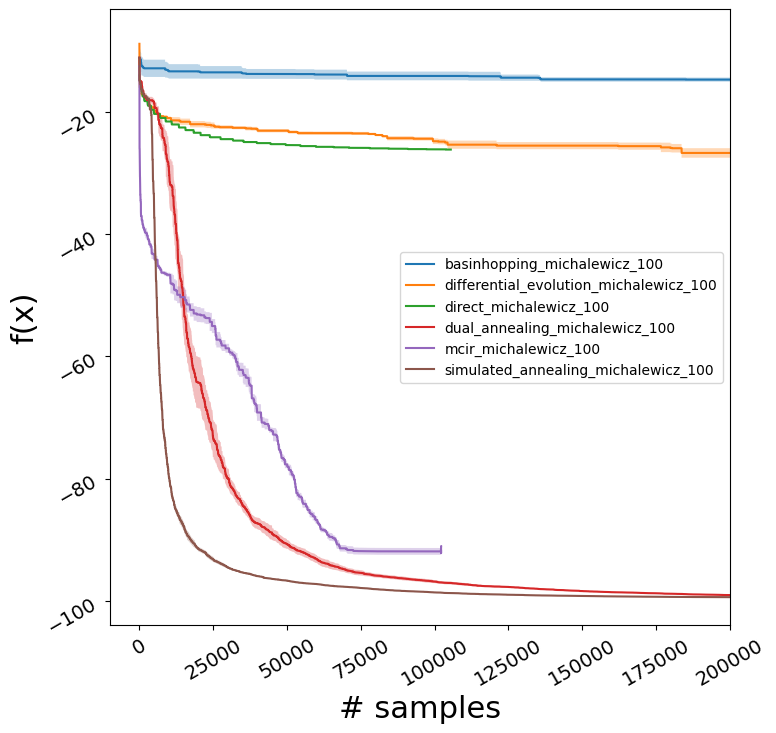

In [108]:
plot(stats_df, 'michalewicz', 100, xlim=[-10000, 200000], ylim=[None, None])

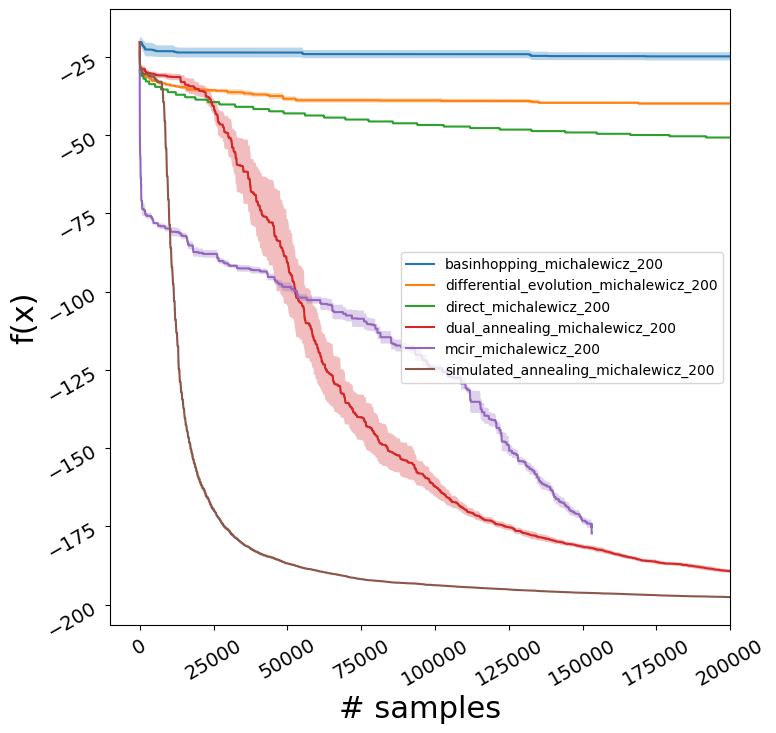

In [113]:
plot(stats_df, 'michalewicz', 200, xlim=[-10000, 200000], ylim=[None, None])

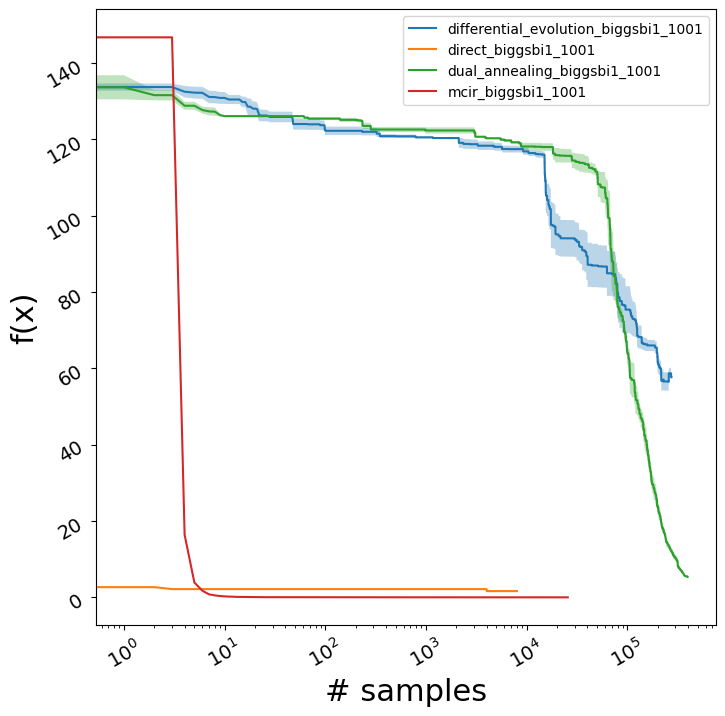

In [130]:
plot(stats_df, 'biggsbi1', 1001, xlim=[None, None], ylim=[None, None], log_x=True)

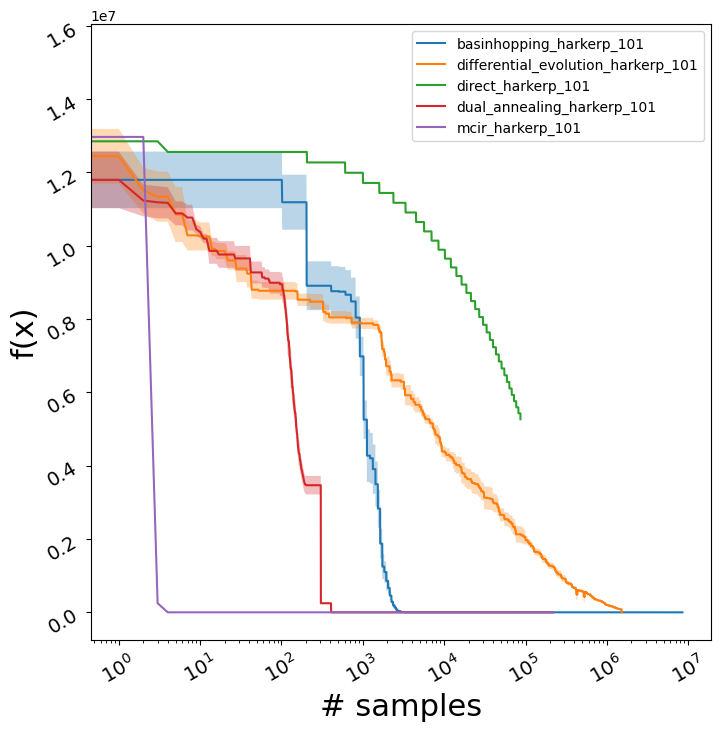

In [132]:
plot(stats_df, 'harkerp', 101, xlim=[None, None], ylim=[None, None], log_x=True)

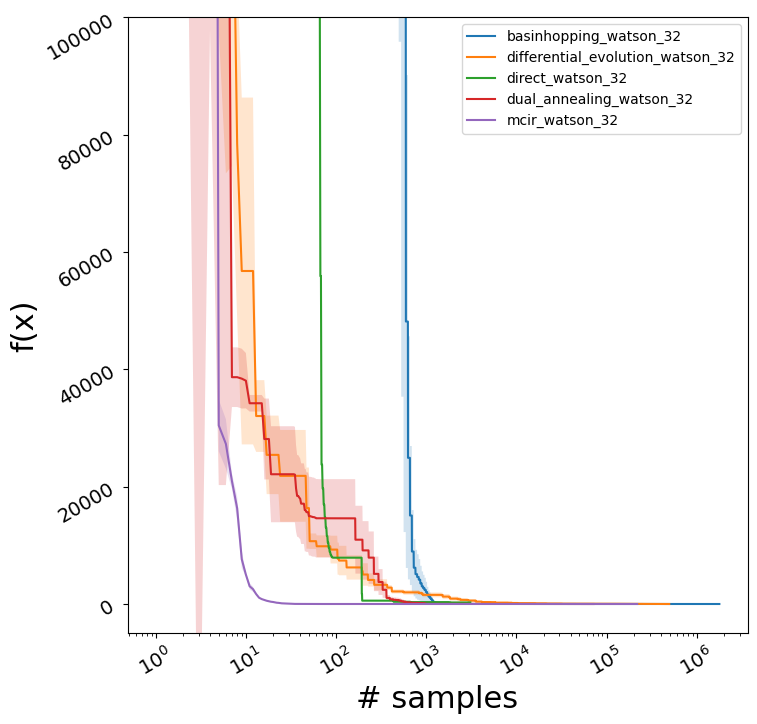

In [141]:
plot(stats_df, 'watson', 32, xlim=[None, None], ylim=[-5000, 100000], log_x=True,)